In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
df = pd.read_csv('../Datasets/iris-dataset.csv', names=cols)

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   label         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


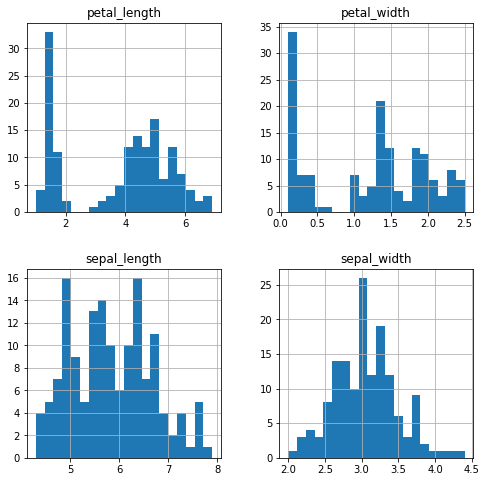

In [6]:
df.hist(bins=20, figsize=(8,8));

In [7]:
df.corr().style.set_precision(4)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.0000,-0.1094,0.8718,0.8180
sepal_width,-0.1094,1.0000,-0.4205,-0.3565
petal_length,0.8718,-0.4205,1.0000,0.9628
petal_width,0.8180,-0.3565,0.9628,1.0000


In [8]:
df['label'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: label, dtype: int64

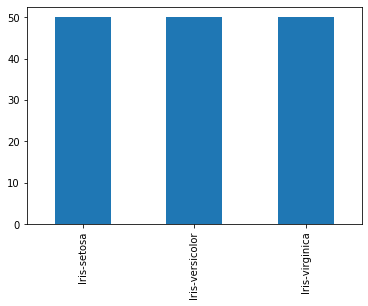

In [9]:
df['label'].value_counts().plot(kind='bar');

## Usando apenas Virgínica e Setosa

In [10]:
df = df[ (df['label'] == 'Iris-setosa') | (df['label'] == 'Iris-versicolor') ]

In [11]:
df['label'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Name: label, dtype: int64

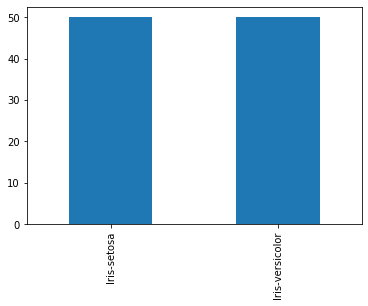

In [12]:
df['label'].value_counts().plot(kind='bar');

## Codificando labels para os valores 1 e -1, respectivamente setorsa e versicolor

In [13]:
df['label'] = np.where(df['label'] == 'Iris-setosa', 1, -1)

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Separando os dados

In [15]:
X = df.values[:, :-1]
y = df.values[:, -1]

## Embaralhando os dados

In [16]:
rs = np.random.RandomState(1)
shuffled_indices = rs.permutation(X.shape[0])
X = X[shuffled_indices]
y = y[shuffled_indices]

In [17]:
X[:5], y[:5]

(array([[5.5, 2.4, 3.8, 1.1],
        [5.4, 3. , 4.5, 1.5],
        [5.5, 4.2, 1.4, 0.2],
        [5.5, 2.4, 3.7, 1. ],
        [5. , 2.3, 3.3, 1. ]]),
 array([-1., -1.,  1., -1., -1.]))

## Separando apenas 5% dos dados para teste

In [18]:
n = 5
X_train = X[:n]
X_test = X[n:]
y_train = y[:n]
y_test = y[n:]

X[:5]

array([[5.5, 2.4, 3.8, 1.1],
       [5.4, 3. , 4.5, 1.5],
       [5.5, 4.2, 1.4, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [5. , 2.3, 3.3, 1. ]])

In [19]:
y_test

array([ 1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1.,
       -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,
       -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,
       -1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,
        1., -1.,  1.,  1.])

## Checagem a partir da das médias da matriz e do vetor

In [20]:
np.average(X_train), np.average(y_train) , np.average(X_test), np.average(y_test)

(3.135, -0.6, 3.0486842105263157, 0.031578947368421054)

## Perceptron 

In [21]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Adaline GD

In [22]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

## Criação, treino e validação com a métrica Acurácia

In [23]:
vals = [[0.1, 0.01, 0.001, 0.0001], [10, 20, 30, 40]]
acc_P = []
acc_A = []
erros_P = []
erros_A = []
for i in range(len(vals[0])):
    model_P = Perceptron(eta = vals[0][i], n_iter = vals[1][i])
    model_P.fit(X_train, y_train)
    y_pred_P = model_P.predict(X_test)
    acc_P.append(sum(y_pred_P == y_test) / y_test.shape[0])
    erros_P.append(model_P.errors_)
    
    
    model_A = AdalineGD(eta = vals[0][i], n_iter = vals[1][i])
    model_A.fit(X_train, y_train)
    y_pred_A = model_A.predict(X_test)
    acc_A.append(sum(y_pred_A == y_test) / y_test.shape[0])
    erros_A.append(model_A.cost_)
    
    

Text(0.5, 1.0, 'Perceptron com o a taxa de aprendizado em 0.1')

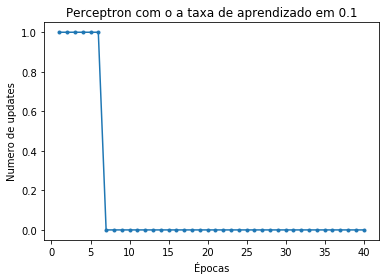

In [24]:
plt.plot(range(1, len(erros_P[3])+1), erros_P[3], marker='.')
plt.xlabel('Épocas')
plt.ylabel('Numero de updates');
plt.title('Perceptron com o a taxa de aprendizado em 0.1')

Text(0.5, 1.0, 'Perceptron com o a taxa de aprendizado em 0.01')

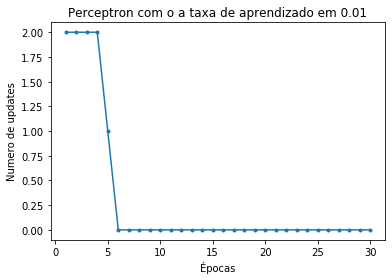

In [25]:
plt.plot(range(1, len(erros_P[2])+1), erros_P[2], marker='.')
plt.xlabel('Épocas')
plt.ylabel('Numero de updates');
plt.title('Perceptron com o a taxa de aprendizado em 0.01')

Text(0.5, 1.0, 'Perceptron com o a taxa de aprendizado em 0.001')

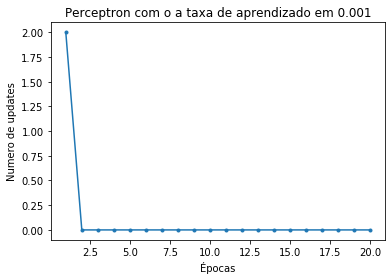

In [26]:
plt.plot(range(1, len(erros_P[1])+1), erros_P[1], marker='.')
plt.xlabel('Épocas')
plt.ylabel('Numero de updates');
plt.title('Perceptron com o a taxa de aprendizado em 0.001')

Text(0.5, 1.0, 'Perceptron com o a taxa de aprendizado em 0.0001')

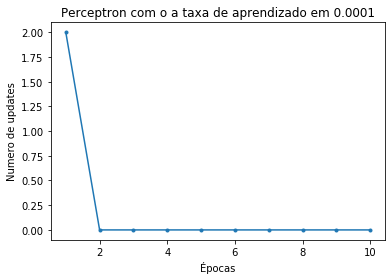

In [27]:
plt.plot(range(1, len(erros_P[0])+1), erros_P[0], marker='.')
plt.xlabel('Épocas')
plt.ylabel('Numero de updates');
plt.title('Perceptron com o a taxa de aprendizado em 0.0001')

Text(0.5, 1.0, 'AdalineGD com o a taxa de aprendizado em 0.1')

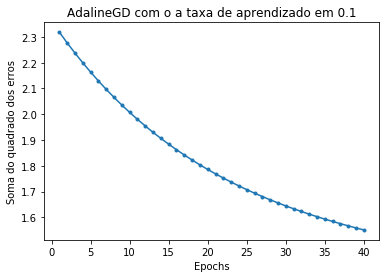

In [28]:
plt.plot(range(1, len(erros_A[3])+1), erros_A[3], marker='.')
plt.xlabel('Epochs')
plt.ylabel('Soma do quadrado dos erros');
plt.title('AdalineGD com o a taxa de aprendizado em 0.1')

Text(0.5, 1.0, 'AdalineGD com o a taxa de aprendizado em 0.01')

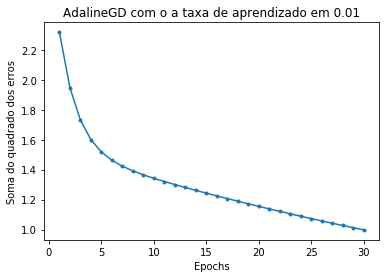

In [29]:
plt.plot(range(1, len(erros_A[2])+1), erros_A[2], marker='.')
plt.xlabel('Epochs')
plt.ylabel('Soma do quadrado dos erros');
plt.title('AdalineGD com o a taxa de aprendizado em 0.01')

Text(0.5, 1.0, 'AdalineGD com o a taxa de aprendizado em 0.001')

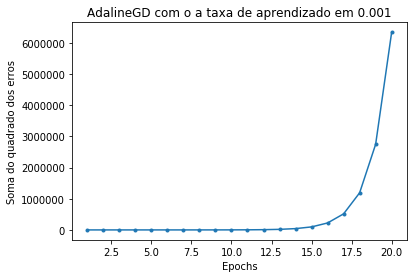

In [30]:
plt.plot(range(1, len(erros_A[1])+1), erros_A[1], marker='.')
plt.xlabel('Epochs')
plt.ylabel('Soma do quadrado dos erros');
plt.title('AdalineGD com o a taxa de aprendizado em 0.001')

Text(0.5, 1.0, 'AdalineGD com o a taxa de aprendizado em 0.0001')

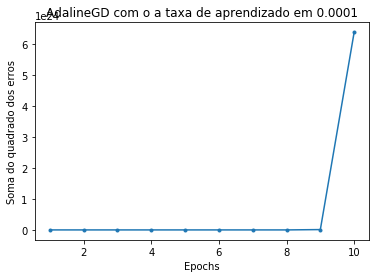

In [31]:
plt.plot(range(1, len(erros_A[0])+1), erros_A[0], marker='.')
plt.xlabel('Epochs')
plt.ylabel('Soma do quadrado dos erros');
plt.title('AdalineGD com o a taxa de aprendizado em 0.0001')

In [32]:
n = []
for i in range(len(vals[0])):
    n.append(str(vals[0][i]) + ' e ' + str(vals[1][i]))

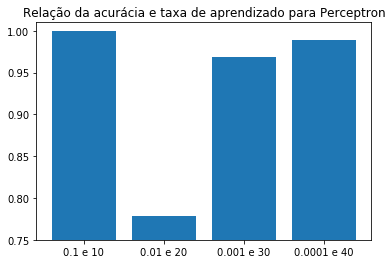

In [33]:
plt.bar(np.arange(4), acc_P)
plt.xticks(np.arange(4), n)
plt.ylim(0.75,1.01)
plt.title('Relação da acurácia e taxa de aprendizado para Perceptron')
plt.show()

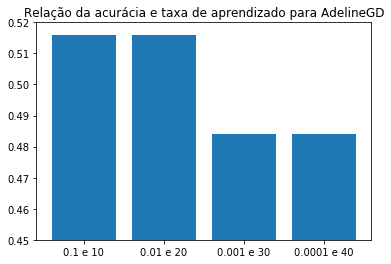

In [34]:
plt.bar(np.arange(4), acc_A)
plt.xticks(np.arange(4), n)
plt.ylim(0.45, 0.52)
plt.title('Relação da acurácia e taxa de aprendizado para AdelineGD')
plt.show()